In [105]:
import pandas as pd
import string
import re

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

from PIL import Image
import requests
from io import BytesIO
import pytesseract

In [106]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/williamsa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
messy_df = pd.read_pickle('../data/messy_df.pkl')

In [108]:
messy_df.head()

,created_utc,num_comments,subreddit,subreddit_subscribers,text,title,upvote_ratio,url,image?
0,1.502177e+09,840.0,TheRedPill,0.0,"As reported in Bloomberg, Google has fired a s...",Google Fires Ph.D Biologist/Engineer For Claim...,0.65,https://www.reddit.com/r/TheRedPill/comments/6...,False
1,1.480424e+09,759.0,TheRedPill,0.0,**A complete guide to picking up 9s and 10s** ...,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,0.82,https://www.reddit.com/r/TheRedPill/comments/5...,False
2,1.502101e+09,179.0,TheRedPill,0.0,**Practical Stoicism Tools**\n\nStoicism philo...,I have been practicing Stoicism for 3 years no...,0.86,https://www.reddit.com/r/TheRedPill/comments/6...,False
3,1.433962e+09,954.0,TheRedPill,0.0,The most notorious target was FatPeopleHate. Y...,"[META] Reddit rolls out first ban wave of ""Har...",0.87,https://www.reddit.com/r/TheRedPill/comments/3...,False
4,1.500270e+09,336.0,TheRedPill,0.0,Kind of surprised this hasn't made its way her...,"Man gets his ex-GF to pay child support, and R...",0.90,https://www.reddit.com/r/TheRedPill/comments/6...,False


In [109]:
#TODO: Image processing: do on windows machine because tessaract only runs on linux and windows

# image_text = []

# for index, row in messy_df.iterrows():
#     if row['image?']:
#         response = requests.get(row['url'])
#         image = Image.open(BytesIO(response.content))
#         image_string = pytesseract.image_to_string(image)
#     else:
#         image_string = ''

#     print(image_string)
#     image_text.append(image_string)


In [110]:
messy_df['total_text'] = messy_df['title'] + ' ' + messy_df['text']

In [111]:
messy_df = messy_df.drop(columns= ['title', 'text'])

In [112]:
messy_df['total_text'].dropna()

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
19004    Bernie spotted multiple times at the marches t...
19005     State Department audit faults Clinton on emails 
19006                                  Simple Explanation 
19007    Vote Rigging Class Action Lawsuit Against DNC ...
19008    Another one added to Clinton Body Count. The a...
Name: total_text, Length: 19009, dtype: object

In [113]:
messy_df['total_text']

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
19004    Bernie spotted multiple times at the marches t...
19005     State Department audit faults Clinton on emails 
19006                                  Simple Explanation 
19007    Vote Rigging Class Action Lawsuit Against DNC ...
19008    Another one added to Clinton Body Count. The a...
Name: total_text, Length: 19009, dtype: object

In [114]:
stopwords_ = stopwords.words('English')
stopwords_ += list(string.punctuation)
stopwords_ += ['’', "'s", "n't", "''", '``', '--', '”', '“', "'m", '...', "'ll", "'d", '‘', "'re", "'ve", "\\-", '—', '–', 'x200b', '..']

stopwords_ += ['r', 'www', 'https', 'http', 'com', 'post', 'sub', 'account', 'imgur', 'amp'] #commonly used reddit link words
stopwords_ += ['like', 'would', 'much', 'also', 'really', 'even', 'gt', 'us', 'never', 'see', 'way', 'could', 'back', 'need', 'take', 'get',
                 'one', 'time', 'want', 'make', 'know', 'thing', 'got', 'many', 'every', 'let', 'lot', 'ever', 'around', 'put', 'enough',
                 'sure', 'may', 'must', 'went', 'often', 'might', 'get', 'probably', 'literally', 'though', 'else', 'least', 'yet', 'set', 
                 'oh', 'na', 'finally', 'nbsp', 'almost', 'simply', 'wo', 'whatever', 'sometimes', 'completely', 'permanently', 'actual', 'possible',
                 'absolutely', 'within', 'including', 'thing', 'something'] #common words in the dataset

In [115]:
lemmatizer = WordNetLemmatizer()

In [116]:
def stop_and_lemmatize(string):
    """
    Helper function for eda on the total corpus
    """
    #current = re.split(r'[^a-zA-Z]', string)
    current = word_tokenize(string)

    total = [x.lower() for x in current if x.lower() not in stopwords_]

    final = [lemmatizer.lemmatize(x) for x in total]

    return final

In [117]:
messy_df['tokenned_stopped_text'] = messy_df['total_text'].apply(stop_and_lemmatize)

In [118]:
messy_df

,created_utc,num_comments,subreddit,subreddit_subscribers,upvote_ratio,url,image?,total_text,tokenned_stopped_text
0,1.502177e+09,840.0,TheRedPill,0.0,0.65,https://www.reddit.com/r/TheRedPill/comments/6...,False,Google Fires Ph.D Biologist/Engineer For Claim...,"[google, fire, ph.d, biologist/engineer, claim..."
1,1.480424e+09,759.0,TheRedPill,0.0,0.82,https://www.reddit.com/r/TheRedPill/comments/5...,False,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"[laid, warlord, 37, rule, approaching, model-t..."
2,1.502101e+09,179.0,TheRedPill,0.0,0.86,https://www.reddit.com/r/TheRedPill/comments/6...,False,I have been practicing Stoicism for 3 years no...,"[practicing, stoicism, 3, year, quality, life,..."
3,1.433962e+09,954.0,TheRedPill,0.0,0.87,https://www.reddit.com/r/TheRedPill/comments/3...,False,"[META] Reddit rolls out first ban wave of ""Har...","[meta, reddit, roll, first, ban, wave, harassi..."
4,1.500270e+09,336.0,TheRedPill,0.0,0.90,https://www.reddit.com/r/TheRedPill/comments/6...,False,"Man gets his ex-GF to pay child support, and R...","[man, get, ex-gf, pay, child, support, reddit,..."
...,...,...,...,...,...,...,...,...,...
19004,1.485058e+09,357.0,HillaryForPrison,54050.0,0.69,https://pbs.twimg.com/media/C2t-mteXUAEoEBR.jpg,True,Bernie spotted multiple times at the marches t...,"[bernie, spotted, multiple, time, march, today..."
19005,1.464187e+09,218.0,HillaryForPrison,54050.0,0.90,http://www.usatoday.com/story/news/politics/20...,False,State Department audit faults Clinton on emails,"[state, department, audit, fault, clinton, email]"
19006,1.483191e+09,126.0,HillaryForPrison,54050.0,0.66,https://i.reddituploads.com/1a378907ac574c8f87...,False,Simple Explanation,"[simple, explanation]"
19007,1.471671e+09,114.0,HillaryForPrison,54050.0,0.88,http://yournewswire.com/wikileaks-vote-rigging...,False,Vote Rigging Class Action Lawsuit Against DNC ...,"[vote, rigging, class, action, lawsuit, dnc, m..."


In [119]:
corpus_series = messy_df['tokenned_stopped_text']

In [120]:
corpus_series

0        [google, fire, ph.d, biologist/engineer, claim...
1        [laid, warlord, 37, rule, approaching, model-t...
2        [practicing, stoicism, 3, year, quality, life,...
3        [meta, reddit, roll, first, ban, wave, harassi...
4        [man, get, ex-gf, pay, child, support, reddit,...
                               ...                        
19004    [bernie, spotted, multiple, time, march, today...
19005    [state, department, audit, fault, clinton, email]
19006                                [simple, explanation]
19007    [vote, rigging, class, action, lawsuit, dnc, m...
19008    [another, added, clinton, body, count, activis...
Name: tokenned_stopped_text, Length: 19009, dtype: object

In [121]:
new_corpus_series = []

for word_list in corpus_series:
    new_corpus_series.extend(word_list)

In [122]:
new_corpus_series = pd.Series(new_corpus_series)

In [123]:
len(new_corpus_series)

683185

In [124]:
freqdist = FreqDist(new_corpus_series)
most_common = freqdist.most_common(500)
most_common

[('right', 4805),
 ('people', 4308),
 ('trans', 3554),
 ('woman', 3155),
 ('year', 2813),
 ('day', 2407),
 ('go', 2344),
 ('think', 2148),
 ('say', 2096),
 ('going', 2014),
 ('work', 1817),
 ('said', 1806),
 ('edit', 1795),
 ('first', 1741),
 ('guy', 1698),
 ('men', 1677),
 ('life', 1673),
 ('good', 1632),
 ('still', 1627),
 ('new', 1623),
 ('trump', 1508),
 ('feel', 1489),
 ('girl', 1476),
 ('told', 1433),
 ('made', 1425),
 ('well', 1407),
 ('thing', 1386),
 ('friend', 1355),
 ('2', 1321),
 ('look', 1307),
 ('come', 1230),
 ('everyone', 1215),
 ('money', 1210),
 ('man', 1207),
 ('someone', 1178),
 ('help', 1172),
 ('call', 1148),
 ('kid', 1142),
 ('week', 1131),
 ('use', 1110),
 ('game', 1094),
 ('month', 1092),
 ('comment', 1089),
 ('job', 1079),
 ('getting', 1077),
 ('point', 1064),
 ('company', 1051),
 ('anything', 1044),
 ('tell', 1043),
 ('thought', 1041),
 ('give', 1039),
 ('last', 1036),
 ('3', 1030),
 ('thank', 1024),
 ('since', 1019),
 ('love', 1002),
 ('keep', 981),
 ('ca', 

In [125]:
top_30 = most_common[0:30]

In [126]:
x = []
y = []

for tuple in top_30:
    x.append(tuple[0])
    y.append(tuple[1])

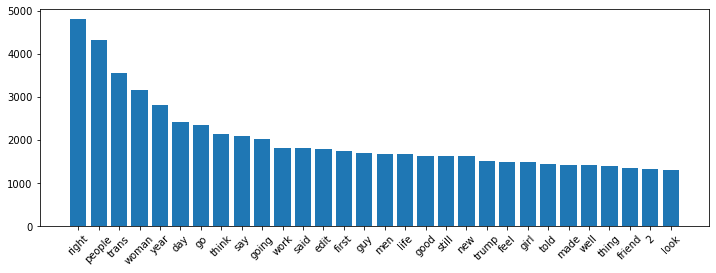

In [127]:
fig, ax = plt.subplots()

fig.set_figwidth(12)

ax.bar(x,y)
plt.xticks(rotation = 45)
plt.show()

In [128]:
messy_df['finalized_text'] = messy_df['tokenned_stopped_text'].apply(lambda x: " ".join(x))

## Combine text by subreddit for clustering

In [129]:
agg_df = messy_df.drop(columns = ['created_utc', 'num_comments', 'subreddit_subscribers', 'upvote_ratio', 'image?', 'url'])

In [130]:
agg_df.head()

,subreddit,total_text,tokenned_stopped_text,finalized_text
0,TheRedPill,Google Fires Ph.D Biologist/Engineer For Claim...,"[google, fire, ph.d, biologist/engineer, claim...",google fire ph.d biologist/engineer claiming a...
1,TheRedPill,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"[laid, warlord, 37, rule, approaching, model-t...",laid warlord 37 rule approaching model-tier gi...
2,TheRedPill,I have been practicing Stoicism for 3 years no...,"[practicing, stoicism, 3, year, quality, life,...",practicing stoicism 3 year quality life increa...
3,TheRedPill,"[META] Reddit rolls out first ban wave of ""Har...","[meta, reddit, roll, first, ban, wave, harassi...",meta reddit roll first ban wave harassing subr...
4,TheRedPill,"Man gets his ex-GF to pay child support, and R...","[man, get, ex-gf, pay, child, support, reddit,...",man get ex-gf pay child support reddit freak k...


In [131]:
total_text_dict = {}

for index, row in agg_df.iterrows():
    if row['subreddit'] in total_text_dict.keys():
        total_text_dict[row['subreddit']] = total_text_dict[row['subreddit']] + ' ' + row['finalized_text']
    else:
        print(row['subreddit'])
        total_text_dict[row['subreddit']] = row['finalized_text']

TheRedPill
ivermectin
BlackPeopleTwitter
WhitePeopleTwitter
politics
worldpolitics
news
worldnews
UpliftingNews
Jokes
funny
gaming
Games
boardgames
pcgaming
technology
tech
gadgets
space
science
askscience
Futurology
nextfuckinglevel
dataisbeautiful
datascience
MurderedByWords
mildlyinteresting
Damnthatsinteresting
mildlyinfuriating
wallstreetbets
Superstonk
stocks
shitposting
pcmasterrace
linuxmasterrace
buildapc
teenagers
PublicFreakout
memes
AskReddit
AskAnAmerican
Gamingcirclejerk
dndmemes
nottheonion
gatesopencomeonin
wholesomememes
interestingasfuck
PoliticalCompassMemes
PoliticalHumor
AskMen
AskWomen
AskNYC
TooAfraidToAsk
MadeMeSmile
rareinsults
UFOs
todayilearned
halo
DnD
Minecraft
RoastMe
Bitcoin
dogecoin
ethereum
NiceHash
CryptoCurrency
cursedcomments
Wellthatsucks
barstoolsports
awfuleverything
unpopularopinion
povertyfinance
personalfinance
economy
Economics
investing
Frugal
IAmA
AmItheAsshole
bestof
atheism
Christianity
Android
apple
google
sysadmin
techsupport
privacy
job

In [132]:
final_df = pd.DataFrame.from_dict(total_text_dict, orient = 'index')

In [133]:
final_df = final_df.rename(columns = {0 : 'text'})

In [134]:
# Pickle data for modeling

pd.to_pickle(final_df, '../data/preprocessed_df.pkl')

## Topic Modeling

In [135]:
lda_text = final_df['text'].apply(lambda x: x.split(" "))

In [136]:
corpus_dictionary = Dictionary(lda_text)
corpus = [corpus_dictionary.doc2bow(text) for text in lda_text]

In [137]:
lda = LdaModel(corpus, num_topics = 5, id2word= corpus_dictionary)

In [138]:
lda.print_topics(num_words = 20)

[(0,
  '0.024*"right" + 0.022*"trans" + 0.006*"people" + 0.005*"year" + 0.004*"woman" + 0.003*"go" + 0.003*"day" + 0.003*"life" + 0.003*"work" + 0.003*"say" + 0.003*"men" + 0.003*"first" + 0.003*"still" + 0.003*"think" + 0.002*"said" + 0.002*"good" + 0.002*"told" + 0.002*"new" + 0.002*"girl" + 0.002*"edit"'),
 (1,
  '0.006*"people" + 0.004*"woman" + 0.003*"year" + 0.003*"say" + 0.003*"trump" + 0.003*"think" + 0.003*"said" + 0.003*"edit" + 0.003*"day" + 0.003*"go" + 0.002*"work" + 0.002*"going" + 0.002*"company" + 0.002*"right" + 0.002*"money" + 0.002*"new" + 0.002*"still" + 0.002*"well" + 0.002*"life" + 0.002*"guy"'),
 (2,
  '0.006*"people" + 0.004*"year" + 0.003*"woman" + 0.003*"going" + 0.003*"go" + 0.003*"day" + 0.003*"say" + 0.003*"men" + 0.003*"work" + 0.003*"think" + 0.003*"said" + 0.003*"job" + 0.002*"girl" + 0.002*"edit" + 0.002*"trump" + 0.002*"right" + 0.002*"new" + 0.002*"feel" + 0.002*"guy" + 0.002*"first"'),
 (3,
  '0.006*"people" + 0.005*"woman" + 0.004*"think" + 0.004*"d